# Raport 1

### Zaimportowane biblioteki

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.diagnostic import het_goldfeldquandt
import scipy as sp
import sklearn.metrics as sm

### Wstęp i opis danych

In [80]:
x = pd.read_csv("AAPL.csv")['Close']
y = pd.read_csv("MSFT.csv")['Close']
days = pd.read_csv("AAPL.csv")['Date']

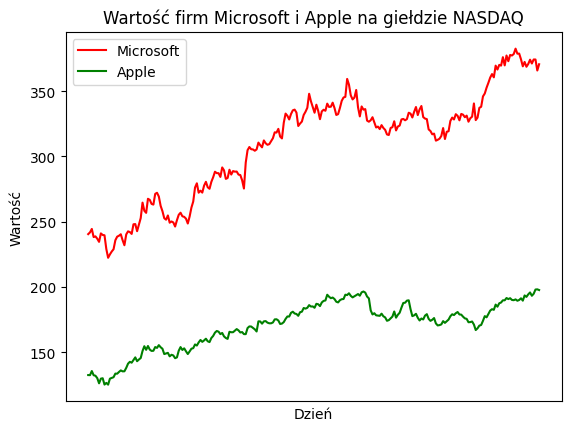

In [289]:
plt.plot(days, y, label='Microsoft', c='r')
plt.tick_params(axis='x', which='both', top=False, labelbottom=False, length=0)
plt.xlabel('Dzień')
plt.ylabel('Wartość')
plt.plot(days, x, label='Apple', c='g')
plt.title('Wartość firm Microsoft i Apple na giełdzie NASDAQ')
plt.legend()

### Analiza jednowymiarowa

#### Microsoft

In [287]:
### miary położenia
meanMicrosoft = np.mean(y)
q1 = np.quantile(y, 0.25)
q3 = np.quantile(y, 0.75)
median = np.median(y)
meanMicrosoft, q1, median, q3

(309.115880648, 275.2775115, 321.8299865, 335.90251125)

In [288]:
### miary rozproszenia
iqr = q3-q1
var = np.var(y)
std = np.std(y)
skewness = sp.stats.skew(y)
curtosis = sp.stats.kurtosis(y)
iqr, var,std, skewness, curtosis

(60.62499974999997,
 1719.2183358465334,
 41.46345783755298,
 -0.3598186455516355,
 -0.891523253362771)

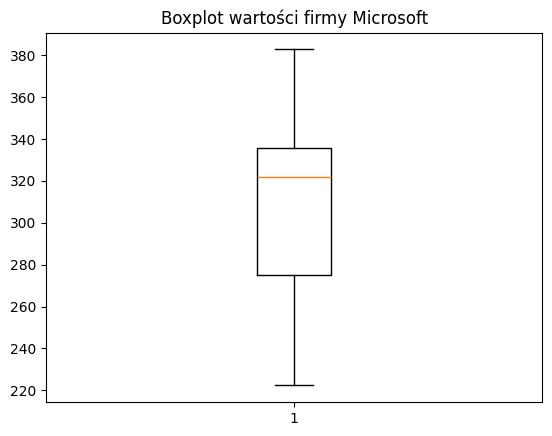

In [291]:
plt.boxplot(y)
plt.title('Boxplot wartości firmy Microsoft')
plt.show()

Text(0.5, 1.0, 'Unormowany histogram wartości firmy Microsoft')

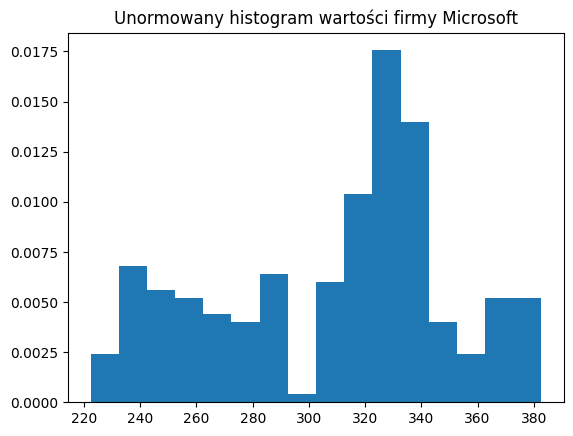

In [293]:
plt.hist(y, bins='sqrt', density=True)
plt.title('Unormowany histogram wartości firmy Microsoft')

#### Apple

In [85]:
### miary położenia
meanApple = np.mean(x)
q1 = np.quantile(x, 0.25)
q3 = np.quantile(x, 0.75)
median = np.median(x)
meanApple, q1, median, q3

(157.694996, 174.20500199999998, 184.079998)

In [86]:
### miary rozproszenia
iqr = q3-q1
var = np.var(x)
std = np.std(x)
skewness = sp.stats.skew(x)
curtosis = sp.stats.kurtosis(x)
iqr, var,std, skewness, curtosis

(-0.6856060547281575, -0.3858005345820237)

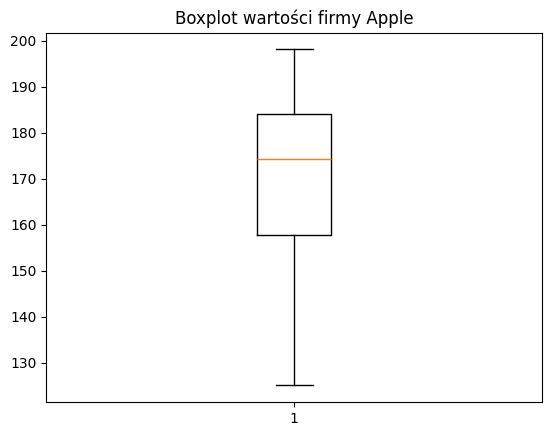

In [294]:
plt.boxplot(x)
plt.title('Boxplot wartości firmy Apple')
plt.show()

Text(0.5, 1.0, 'Unormowany histogram wartości firmy Apple')

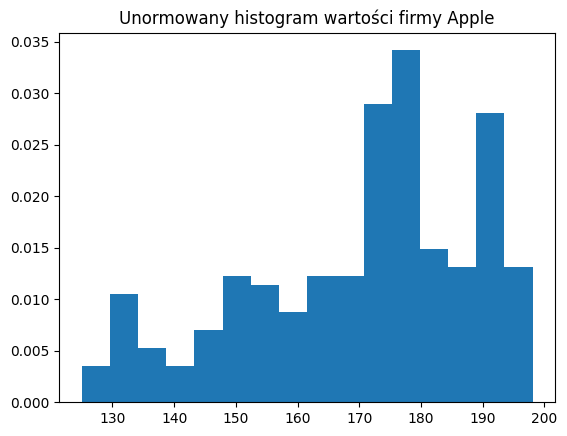

In [295]:
plt.hist(x, bins='sqrt', density=True)
plt.title('Unormowany histogram wartości firmy Apple')

### Analiza zależności liniowej

Text(0, 0.5, 'Wartość Microsoft')

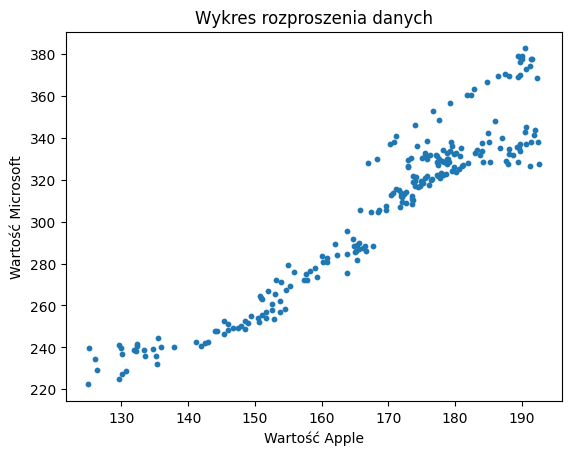

In [300]:
n=230
sort = np.argsort(x)
xSort = x[sort]
ySort = y[sort]
xTre = xSort[:n]
yTre = ySort[:n]
xTest = xSort[n:]
yTest = ySort[n:]
xMean = np.mean(xTre)
yMean = np.mean(yTre)
plt.scatter(xTre,yTre, s=10)
plt.title('Wykres rozproszenia danych')
plt.xlabel('Wartość Apple')
plt.ylabel('Wartość Microsoft')

Text(0, 0.5, 'Wartość Microsoft')

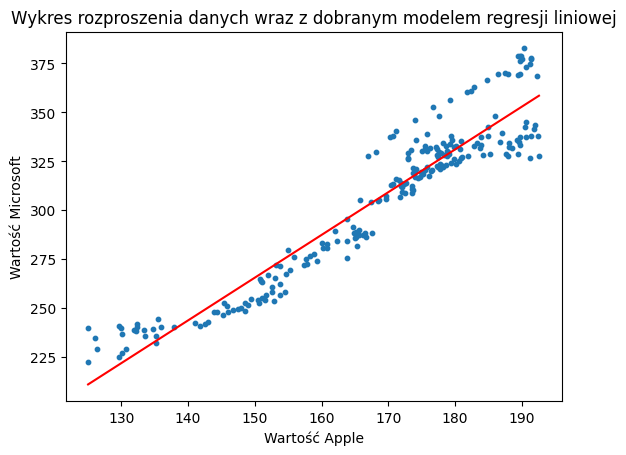

In [301]:
beta1 = np.sum((xTre-xMean)*(yTre-yMean))/np.sum((xTre-xMean)**2)
beta0 = yMean - beta1*xMean
yHat = beta1*xTre+beta0

plt.plot(xTre, yHat, c='r')
plt.scatter(xTre, yTre, s=10)
plt.title('Wykres rozproszenia danych wraz z dobranym modelem regresji liniowej')
plt.xlabel('Wartość Apple')
plt.ylabel('Wartość Microsoft')

In [264]:
alfa = 0.05
s = np.sqrt(np.sum((yHat-yTre)**2)/n-2)
leftBeta1 = beta1 - s*sp.stats.t.ppf(1-alfa/2, df=n-2)/np.sum((xTre-xMean)**2)
rightBeta1 = beta1 + s*sp.stats.t.ppf(1-alfa/2, df=n-2)/np.sum((xTre-xMean)**2)
leftBeta0 = beta0 - s*sp.stats.t.ppf(1-alfa/2, df=n-2)*np.sqrt(1/n + xMean**2/np.sum((xTre-xMean)**2))
rightBeta0 = beta0 + s*sp.stats.t.ppf(1-alfa/2, df=n-2)*np.sqrt(1/n + xMean**2/np.sum((xTre-xMean)**2))

pearsonCoeff = np.corrcoef(yTre, yHat)[0,1]
r2 = sm.r2_score(yTre, yHat)
sst = np.sum((yTre - yMean)**2)
sse = np.sum((yHat - yTre)**2)
ssr = np.sum((yHat - yMean)**2)
mse = sm.mean_squared_error(yTre,yHat)
mae = sm.mean_absolute_error(yTre,yHat)
sst, sse, ssr, pearsonCoeff, r2, mse, mae


(379617.3855210553,
 37927.64386431411,
 341689.741656741,
 0.9487306326317478,
 0.900089813293837,
 164.90279941006133,
 10.151161830235514)

### Predykcja

In [265]:
yHatTest = beta1*xTest+beta0
yMean = np.mean(yTest)
r2 = sm.r2_score(yTest, yHatTest)
mse = sm.mean_squared_error(yTest,yHatTest)
mae = sm.mean_absolute_error(yTest,yHatTest)
r2, mse, mae

(-0.24711081820743708, 292.1113379436486, 14.382563005490947)

In [266]:
left = beta0 + beta1*xTest - sp.stats.t.ppf(1-alfa/2, df=n-2)*s*np.sqrt(1+1/n + ((xTest-xMean)**2)/np.sum((xTre-xMean)**2))
right = beta0 + beta1*xTest + sp.stats.t.ppf(1-alfa/2, df=n-2)*s*np.sqrt(1+1/n + ((xTest-xMean)**2)/np.sum((xTre-xMean)**2))

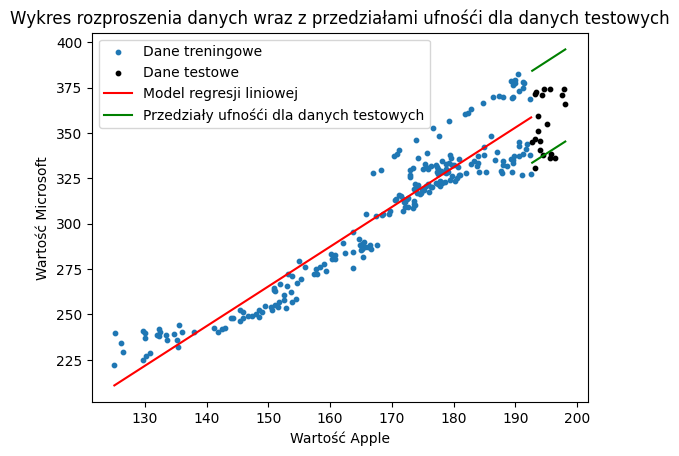

In [308]:
plt.scatter(xTre, yTre, s=10, label='Dane treningowe')
plt.scatter(xTest, yTest, s=10, c='black', label='Dane testowe')
plt.plot(xTre, beta1*xTre + beta0,c='r', label='Model regresji liniowej')
plt.plot(xTest, right, c='g', label='Przedziały ufnośći dla danych testowych')
plt.plot(xTest, left, c='g')
plt.xlabel('Wartość Apple')
plt.ylabel('Wartość Microsoft')
plt.title('Wykres rozproszenia danych wraz z przedziałami ufnośći dla danych testowych')
plt.legend()

### Analiza residuów

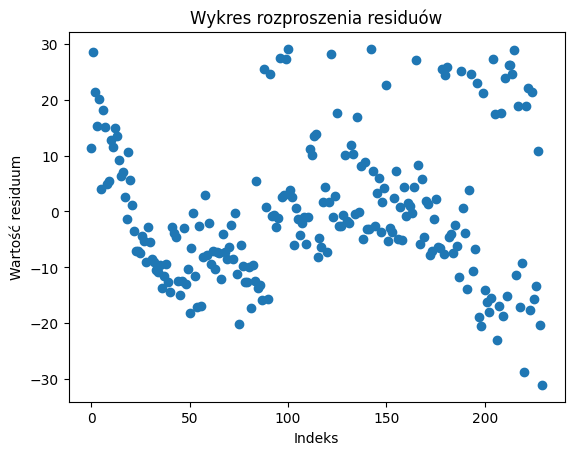

In [310]:
ei = (np.array(yTre) - np.array(yHat))
plt.scatter(np.arange(230), ei)
plt.title('Wykres rozproszenia residuów')
plt.xlabel('Indeks')
plt.ylabel('Wartość residuum')
eiMean = np.mean(ei)

Text(0.5, 1.0, 'Boxplot wartości residuów')

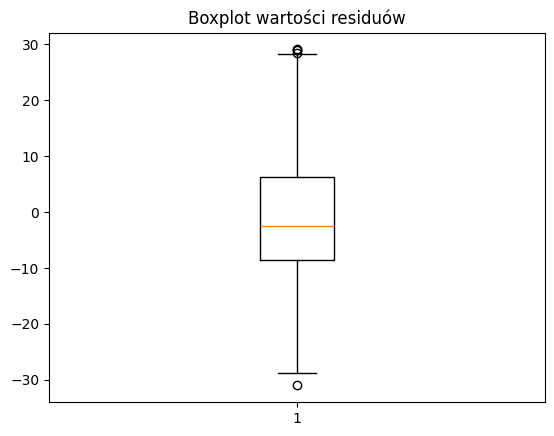

In [311]:
plt.boxplot(ei)
plt.title("Boxplot wartości residuów")

SignificanceResult(statistic=13.504693679272016, pvalue=0.0011681349759684496)

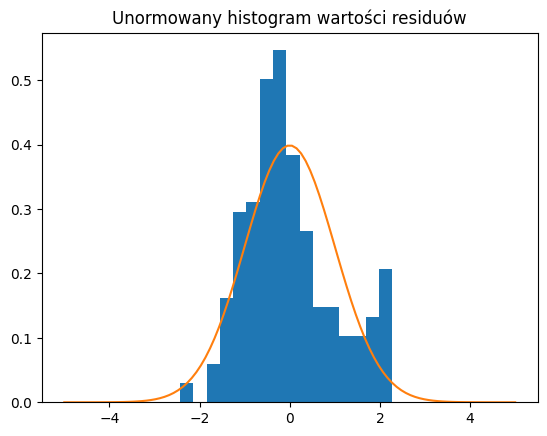

In [312]:
se = np.sqrt(np.sum((ei-eiMean)**2)/n-2)
eiNorm = (ei-eiMean)/se
plt.hist(eiNorm, bins='sqrt', density=True)
xs = np.linspace(-5, 5, 100)
plt.plot(xs,sp.stats.norm.pdf(xs))
plt.title("Unormowany histogram wartości residuów")
sp.stats.kstest(eiNorm, sp.stats.norm.cdf)
sp.stats.jarque_bera(eiNorm)

In [271]:
def autocov(xs, h):
    n = len(xs)
    xsMean = np.mean(xs)
    autoc = 0
    for i in range(n-h):
        autoc += (xs[i]-xsMean)*(xs[i+h]-xsMean)
    return autoc/n

def autocorr(xs, h):
    return autocov(xs, h)/autocov(xs, 0)

Text(0.5, 1.0, 'Wykres funkcji autokorelacji residuów')

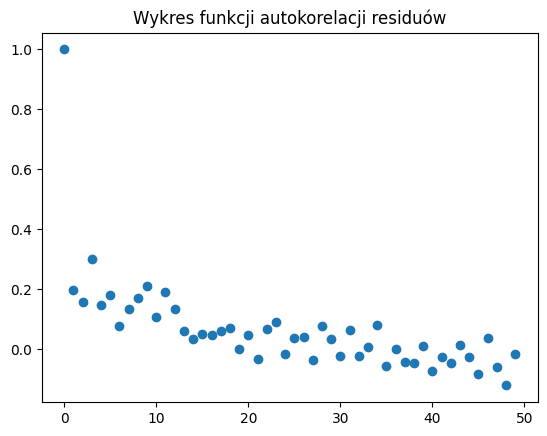

In [313]:
autocorrs = []
for i in range(50):
    autocorrs.append(autocorr(ei, i))

plt.scatter(np.arange(50), autocorrs)
plt.title("Wykres funkcji autokorelacji residuów")

158


(191743.8265184741,
 6190.368823288929,
 185553.4576951852,
 0.9837252769118169,
 0.9677154204352311,
 39.179549514486894,
 5.1285306748657575)

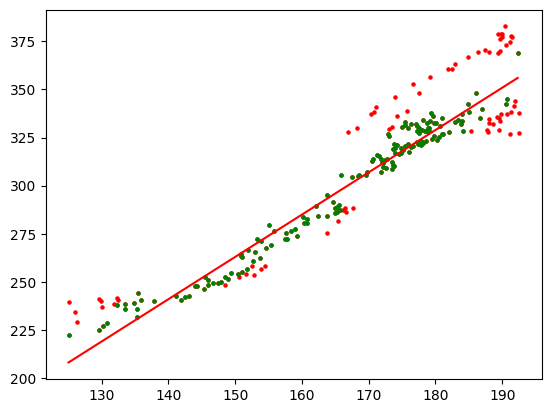

In [273]:
plt.scatter(xTre, yTre, c='r', s=5)
xOutliers = xTre[np.abs(ei)<np.std(ei)]
yOutliers = yTre[np.abs(ei)<np.std(ei)]
print(len(xOutliers))
plt.scatter(xOutliers, yOutliers,c='g',s=5)
xTre = xOutliers[:n]
yTre = yOutliers[:n]
xTest = xOutliers[n:]
yTest = yOutliers[n:]
xMean = np.mean(xTre)
yMean = np.mean(yTre)
beta1 = np.sum((xTre-xMean)*(yTre-yMean))/np.sum((xTre-xMean)**2)
beta0 = yMean - beta1*xMean
yHat = beta1*xTre +beta0
plt.plot(xTre, yHat, c='r')
pearsonCoeff = np.corrcoef(yTre, yHat)[0,1]
r2 = sm.r2_score(yTre, yHat)
sst = np.sum((yTre - yMean)**2)
sse = np.sum((yHat - yTre)**2)
ssr = np.sum((yHat - yMean)**2)
mse = sm.mean_squared_error(yTre,yHat)
mae = sm.mean_absolute_error(yTre,yHat)
sst, sse, ssr, pearsonCoeff, r2, mse, mae


2.716251977209497e-14

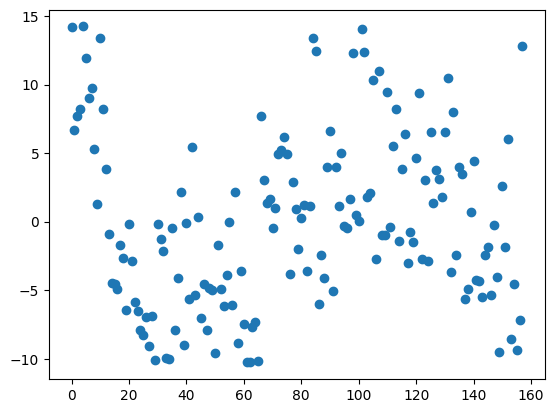

In [274]:
ei = yTre-yHat
plt.scatter(np.arange(158), ei)
eiMean = np.mean(ei)
eiMean

SignificanceResult(statistic=6.679115940659451, pvalue=0.03545262537086366)

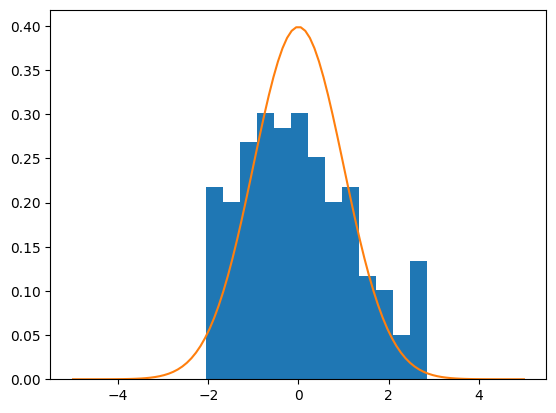

In [275]:
se = np.sqrt(np.sum((ei-eiMean)**2)/n-2)
eiNorm = (ei-eiMean)/se
plt.hist(eiNorm, bins='sqrt', density=True)
xs = np.linspace(-5, 5, 100)
plt.plot(xs,sp.stats.norm.pdf(xs))
sp.stats.kstest(eiNorm, sp.stats.norm.cdf)
sp.stats.jarque_bera(eiNorm)

158

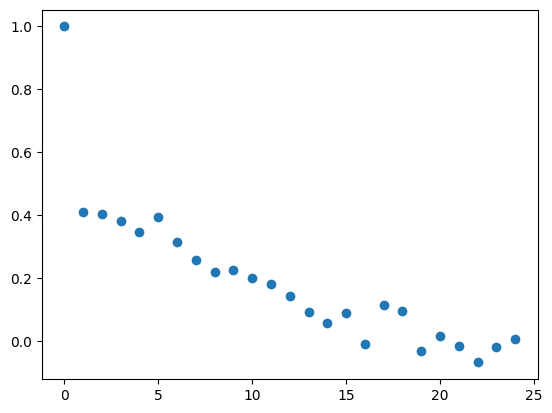

In [282]:
autocorrs = []
for i in range(25):
    autocorrs.append(autocorr(np.array(ei), i))

plt.scatter(np.arange(25), autocorrs)
len(ei)

In [283]:
sp.stats.levene(xTre, ei)
sp.stats.bartlett(xTre, ei)

BartlettResult(statistic=115.59208048136995, pvalue=5.8384226139554624e-27)

### Podsumowanie

In [ ]:
### X to zmienna objaśniająca